<a href="https://colab.research.google.com/github/Bishalroybd/Weather-prediction/blob/main/Weather_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
import os
import pandas as pd

# Define file path
base_dir = "/content/drive/MyDrive/Colab Notebooks"
file_name = "OSMANY INTERNATIONAL, BG.csv"
file_path = os.path.join(base_dir, file_name)

# Load CSV file
weather = pd.read_csv(file_path, index_col="DATE")

# Print DataFrame
weather


,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2000-01-01,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,66,80.0,NaN
2000-01-07,BGM00041891,"OSMANY INTERNATIONAL, BG",NaN,69,NaN,NaN
2000-01-08,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,59,71.0,NaN
2000-01-10,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,63,75.0,NaN
2000-01-13,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,66,80.0,NaN
...,...,...,...,...,...,...
2024-11-24,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,71,NaN,64.0
2024-11-25,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,72,NaN,64.0
2024-11-26,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,72,NaN,63.0


In [13]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

,0
STATION,0.000000
NAME,0.000000
PRCP,0.013259
TAVG,0.000000
TMAX,0.157573
TMIN,0.615162


In [16]:
valid_columns = weather.columns[null_pct < .7]

In [17]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [18]:
weather = weather[valid_columns].copy()

In [21]:
weather.columns = weather.columns.str.lower()

In [22]:
weather

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
2000-01-01,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,66,80.0,NaN
2000-01-07,BGM00041891,"OSMANY INTERNATIONAL, BG",NaN,69,NaN,NaN
2000-01-08,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,59,71.0,NaN
2000-01-10,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,63,75.0,NaN
2000-01-13,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,66,80.0,NaN
...,...,...,...,...,...,...
2024-11-24,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,71,NaN,64.0
2024-11-25,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,72,NaN,64.0
2024-11-26,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,72,NaN,63.0


In [23]:
weather = weather.ffill()

In [24]:
weather.apply(pd.isnull).sum()

,0
station,0
name,0
prcp,0
tavg,0
tmax,0
tmin,18


In [25]:
weather.apply(lambda x: (x == 9999).sum())

,0
station,0
name,0
prcp,0
tavg,0
tmax,0
tmin,0


In [26]:
weather.dtypes

,0
station,object
name,object
prcp,float64
tavg,int64
tmax,float64
tmin,float64


In [27]:
weather.index

Index(['2000-01-01', '2000-01-07', '2000-01-08', '2000-01-10', '2000-01-13',
       '2000-01-15', '2000-01-20', '2000-01-25', '2000-01-28', '2000-01-30',
       ...
       '2024-11-15', '2024-11-16', '2024-11-17', '2024-11-22', '2024-11-23',
       '2024-11-24', '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28'],
      dtype='object', name='DATE', length=5883)

In [28]:
weather.index = pd.to_datetime(weather.index)

In [29]:
weather.index.year.value_counts().sort_index()

,count
DATE,
2000,198
2001,247
2002,215
2003,199
2004,182
2005,206
2006,277
2007,202
2008,164


<Axes: xlabel='DATE'>

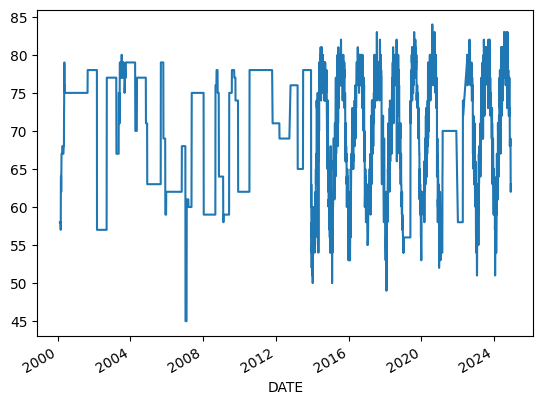

In [31]:
weather["tmin"].plot()

In [32]:
weather["target"] = weather.shift(-1)["tmax"]

In [33]:
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
2000-01-01,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,66,80.0,NaN,80.0
2000-01-07,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,69,80.0,NaN,71.0
2000-01-08,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,59,71.0,NaN,75.0
2000-01-10,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,63,75.0,NaN,80.0
2000-01-13,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,66,80.0,NaN,81.0
...,...,...,...,...,...,...,...
2024-11-24,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,71,91.0,64.0,91.0
2024-11-25,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,72,91.0,64.0,91.0
2024-11-26,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,72,91.0,63.0,91.0


In [34]:
weather = weather.ffill()

In [35]:
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
2000-01-01,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,66,80.0,NaN,80.0
2000-01-07,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,69,80.0,NaN,71.0
2000-01-08,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,59,71.0,NaN,75.0
2000-01-10,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,63,75.0,NaN,80.0
2000-01-13,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,66,80.0,NaN,81.0
...,...,...,...,...,...,...,...
2024-11-24,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,71,91.0,64.0,91.0
2024-11-25,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,72,91.0,64.0,91.0
2024-11-26,BGM00041891,"OSMANY INTERNATIONAL, BG",0.0,72,91.0,63.0,91.0


In [36]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [37]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [40]:
!pip install scikit-learn

In [41]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer

rr = Ridge(alpha=.1)

def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        # Create an imputer to fill NaN values with the mean
        imputer = SimpleImputer(strategy='mean')

        # Fit the imputer on the training data and transform both train and test
        train[predictors] = imputer.fit_transform(train[predictors])
        test[predictors] = imputer.transform(test[predictors])

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [42]:
predictions = backtest(weather, rr, predictors)

<ipython-input-41-0ba44a03281a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = imputer.fit_transform(train[predictors])
<ipython-input-41-0ba44a03281a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[predictors] = imputer.transform(test[predictors])
<ipython-input-41-0ba44a03281a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

2.6544846592917395

In [44]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2016-03-27,73.0,90.338107,17.338107
2020-05-12,78.0,94.229860,16.229860
2018-03-12,73.0,88.485170,15.485170
2019-10-17,77.0,92.301857,15.301857
2017-03-10,71.0,84.931146,13.931146
...,...,...,...
2023-07-18,93.0,92.989784,0.010216
2024-02-04,80.0,79.990085,0.009915
2018-07-26,91.0,91.002619,0.002619


In [45]:
pd.Series(rr.coef_, index=predictors)

,0
prcp,-0.134094
tavg,0.283248
tmax,0.511173
tmin,0.001049


In [46]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [47]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [48]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [49]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [50]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

<ipython-input-41-0ba44a03281a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = imputer.fit_transform(train[predictors])
<ipython-input-41-0ba44a03281a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[predictors] = imputer.transform(test[predictors])
<ipython-input-41-0ba44a03281a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

2.599961824654288

In [51]:
mean_squared_error(predictions["actual"], predictions["prediction"])

12.291272480692104

In [52]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2020-05-12,78.0,94.367008,16.367008
2018-03-12,73.0,89.208600,16.208600
2019-10-17,77.0,92.207906,15.207906
2017-03-10,71.0,86.090595,15.090595
2024-03-20,76.0,90.333521,14.333521
...,...,...,...
2023-10-26,89.0,89.002655,0.002655
2020-11-24,83.0,82.998559,0.001441
2017-01-06,81.0,80.998591,0.001409


<Axes: xlabel='diff'>

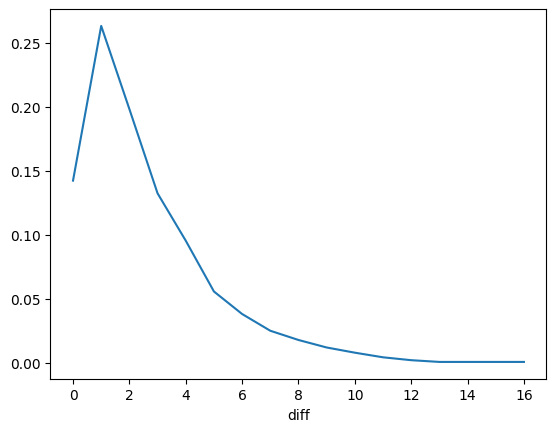

In [53]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [54]:
predictions

,actual,prediction,diff
DATE,,,
2016-04-03,83.0,82.425060,0.574940
2016-04-04,77.0,85.470289,8.470289
2016-04-05,84.0,80.482875,3.517125
2016-04-06,84.0,86.773020,2.773020
2016-04-07,88.0,87.536417,0.463583
...,...,...,...
2024-11-24,91.0,88.602941,2.397059
2024-11-25,91.0,88.708711,2.291289
2024-11-26,91.0,88.722295,2.277705


In [56]:
def get_weather_input():
  date_str = input("Enter date in YYYY-MM-DD format (e.g., 2024-03-15): ")
  date = pd.to_datetime(date_str)

  tmax = float(input("Enter TMAX: "))
  tmin = float(input("Enter TMIN: "))
  tavg = float(input("Enter TAVG: "))
  prcp = float(input("Enter PRCP: "))

  # Create a DataFrame for the input data
  input_data = pd.DataFrame({
      "tmax": [tmax],
      "tmin": [tmin],
      "tavg": [tavg],
      "prcp": [prcp]
  }, index=[date])

  # ... (Add other relevant features like rolling averages, month averages, etc.) ...

  return input_data

In [58]:
def get_weather_input():
    date_str = input("Enter date in YYYY-MM-DD format (e.g., 2024-03-15): ")
    date = pd.to_datetime(date_str)

    tmax = float(input("Enter TMAX: "))
    tmin = float(input("Enter TMIN: "))
    tavg = float(input("Enter TAVG: "))
    prcp = float(input("Enter PRCP: "))

    # Create a DataFrame for the input data with all necessary columns
    input_data = pd.DataFrame({
        "tmax": [tmax],
        "tmin": [tmin],
        "tavg": [tavg],
        "prcp": [prcp],
        # Add other necessary columns with initial values (e.g., 0)
        "rolling_3_tmax": [0],
        "rolling_3_tmax_pct": [0],
        "rolling_3_tmin": [0],
        "rolling_3_tmin_pct": [0],
        "rolling_3_prcp": [0],
        "rolling_3_prcp_pct": [0],
        "rolling_14_tmax": [0],
        "rolling_14_tmax_pct": [0],
        "rolling_14_tmin": [0],
        "rolling_14_tmin_pct": [0],
        "rolling_14_prcp": [0],
        "rolling_14_prcp_pct": [0],
        "month_avg_tmax": [0],
        "day_avg_tmax": [0],
        "month_avg_tmin": [0],
        "day_avg_tmin": [0],
        "month_avg_prcp": [0],
        "day_avg_prcp": [0]
    }, index=[date])

    # ... (Add logic to calculate values for the added columns) ...
    # You need to replicate the feature engineering logic from your training data
    # to populate these columns appropriately based on the input values.

    return input_data

In [60]:
input_data = get_weather_input()
# ... (Preprocess input_data) ...

prediction = rr.predict(input_data[predictors])
print("Predicted TMAX for the next day:", prediction[0])

Enter date in YYYY-MM-DD format (e.g., 2024-03-15): 2024-11-30
Enter TMAX: 87
Enter TMIN: 66
Enter TAVG: 76
Enter PRCP: 0
Predicted TMAX for the next day: 64.73406039338242
